# Eliminador de conectores (stopwords)

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Descargar stopwords de NLTK si es necesario
nltk.download('stopwords')

# Función para eliminar stopwords
def remove_stopwords(texts):
    stop_words = set(stopwords.words('english'))
    cleaned_texts = []
    for text in texts:
        cleaned_text = ' '.join([word for word in text.split() if word not in stop_words])
        cleaned_texts.append(cleaned_text)
    return cleaned_texts

# Función para cargar el CSV de abstracts lematizados y eliminar stopwords
def preprocess_text(file_path, output_file):
    # Cargar los abstracts lematizados
    df = pd.read_csv(file_path)
    
    # Verificar si tiene una columna llamada 'Lemmas' (o ajustar al nombre correcto)
    if 'Lemmas' in df.columns:
        texts = df['Lemmas'].tolist()
    else:
        raise ValueError("La columna 'Lemmas' no se encontró en el archivo CSV")
    
    # Eliminar stopwords
    texts_cleaned = remove_stopwords(texts)
    
    # Crear un nuevo DataFrame con los textos sin stopwords
    df_cleaned = pd.DataFrame({'Lemmas': texts_cleaned})
    
    # Guardar en un nuevo archivo CSV
    df_cleaned.to_csv(output_file, index=False)
    print(f"Archivo guardado en: {output_file}")

# Ejecutar el proceso de preprocesamiento
file_path = 'lemmatized_abstracts.csv'
output_file = 'no_stopwords_abstracts.csv'
preprocess_text(file_path, output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Archivo guardado en: no_stopwords_abstracts.csv


# Implementación de LDA

Tema 1:
['sustainable', 'research', 'study', 'social', 'policy', 'finance', 'economic', 'risk', 'development', 'financial']
Tema 2:
['credit', 'effect', 'result', 'use', 'study', 'firm', 'bank', 'market', 'financial', 'risk']
Tema 3:
['process', 'model', 'datum', 'base', 'project', 'management', 'system', 'use', 'financial', 'risk']
Tema 4:
['factor', 'result', 'high', 'care', 'financial', 'use', 'study', 'patient', 'risk', 'health']
Tema 5:
['method', 'problem', 'asset', 'financial', 'price', 'use', 'market', 'portfolio', 'risk', 'model']


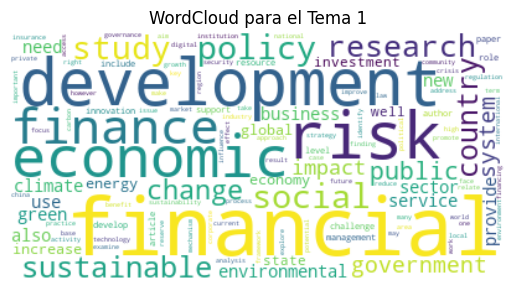

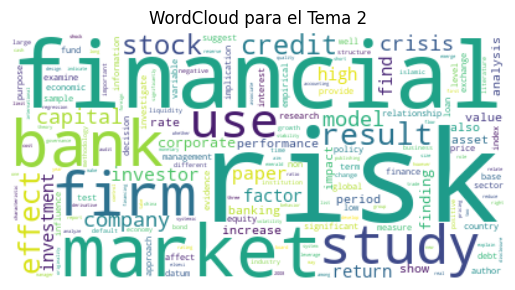

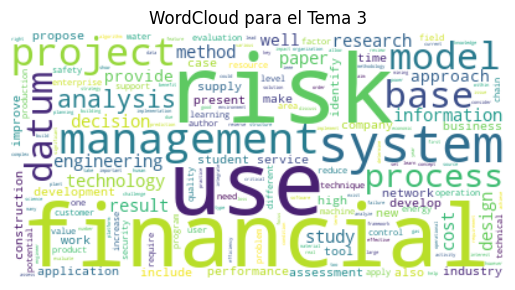

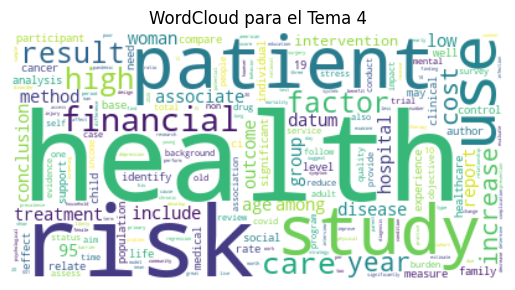

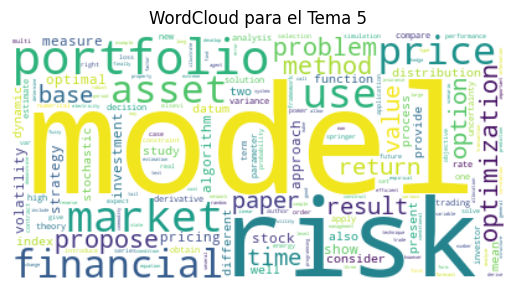

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Función para entrenar LDA
def apply_lda(file_path, num_topics=5, num_words=10):
    # Cargar el archivo CSV sin stopwords
    df = pd.read_csv(file_path)
    
    # Verificar si tiene una columna llamada 'Lemmas'
    if 'Lemmas' in df.columns:
        texts_cleaned = df['Lemmas'].tolist()
    else:
        raise ValueError("La columna 'Lemmas' no se encontró en el archivo CSV")
    
    # Convertir a Bag of Words
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    X = vectorizer.fit_transform(texts_cleaned)
    
    # Entrenar LDA
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X)
    
    # Obtener los términos (palabras) más representativos de cada tema
    terms = vectorizer.get_feature_names_out()
    
    for idx, topic in enumerate(lda_model.components_):
        print(f"Tema {idx+1}:")
        print([terms[i] for i in topic.argsort()[-num_words:]])
    
    return lda_model, vectorizer, X

# Visualización opcional de los temas con WordCloud
def visualize_topics(lda_model, vectorizer, num_topics=5):
    terms = vectorizer.get_feature_names_out()
    
    for idx, topic in enumerate(lda_model.components_):
        word_freq = {terms[i]: topic[i] for i in topic.argsort()}
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freq)
        
        # Mostrar el WordCloud
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud para el Tema {idx+1}")
        plt.show()

# Ejecutar el proceso de LDA
file_path = 'no_stopwords_abstracts.csv'
lda_model, vectorizer, X = apply_lda(file_path, num_topics=5, num_words=10)

# Visualizar los temas generados
visualize_topics(lda_model, vectorizer, num_topics=5)
